In [1]:
#using nltk for spam detection
import nltk
#nltk.download_shell()

import pandas as pd
import numpy as np

In [2]:
messages = [line.rstrip() for line in open('H:/Symbiosis/Courses/_Udemy- PYTHON data science and machine learning bootcamp/Python for Data Science and Machine Learning Bootcamp/Codes_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
messages[5]

"spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"

In [5]:
#collection of texts is called corpus

In [6]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages[0]  #\t means it is tab seperated file

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
messages = pd.read_csv('H:/Symbiosis/Courses/_Udemy- PYTHON data science and machine learning bootcamp/Python for Data Science and Machine Learning Bootcamp/Codes_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection', 
                      sep= '\t', names= ['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

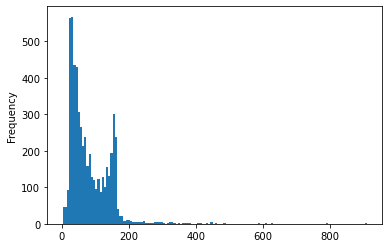

In [12]:
messages['length'].plot.hist(bins=140)   #message characters length

In [13]:
messages['length'].describe()  
#maximum characters msg is of 910 characters. Let's see what that msg is

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

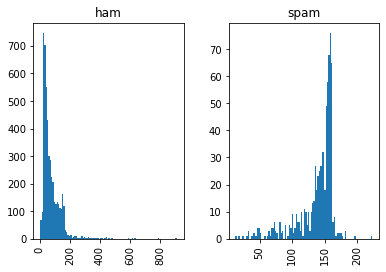

In [15]:
messages.hist(column = 'length', by='label', bins= 100)

In [16]:
#when ham, the freq of charaters is less while its the opposite for spam.

Removing the punctuation marks and stopwords

In [17]:
import string

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
#sample messsage to remove punctuation marks
mess = 'Sample message!! Notice: it has, punctuation.'

nopunc= [c for c in mess if c not in string.punctuation]
#print(nopunc)
nopunc = ''.join(nopunc)
print(nopunc)

Sample message Notice it has punctuation


In [20]:
from nltk.corpus import stopwords

In [21]:
#stopwords.words('english')

In [22]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [23]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess
#give output for word in word in nopunc.split if lowercase word is not in the stopwords

['Sample', 'message', 'Notice', 'punctuation']

In [24]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [25]:
#we are going to tokenize these messages. Tokenize is the clean version of words that we want

In [26]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
## Count vectorization, bag of words transformer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])  ##bow = bag of words

In [29]:
print(len(bow_transformer.vocabulary_))

11425


In [34]:
mess4 = messages['message'][3]   #taking msg number 4 for example
print(mess4)

U dun say so early hor... U c already then say...


In [33]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

#This means there are 7 unique words in msg 4 after removing the common stopwords.

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [32]:
print(bow4.shape)

(1, 11425)


In [35]:
#to check which words have come multiple times check with the index

In [36]:
bow_transformer.get_feature_names()[9554]

'say'

In [37]:
messages_bow = bow_transformer.transform(messages['message'])

In [38]:
print('Shape of the sparse matrix:', messages_bow.shape)

Shape of the sparse matrix: (5572, 11425)


In [40]:
messages_bow.nnz #(nnz =non zero occurences)

50548

In [41]:
sparsity= (100* messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

#This is comparing number of non zero msgs to the total number of msgs

sparsity: 0.07940295412668218


In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [44]:
tfidf4 = tfidf_transformer.transform(bow4)

In [45]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [ ]:
#we have now a tf and idf for this particular msg. These numbers can be interpreted as weight value for each of the words vs the actual document

In [46]:
#to check the inverse document freq of the word university

tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [47]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [48]:
#Using Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [53]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [54]:
messages['label'][3]

'ham'

In [62]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [65]:
#Create a pipeline to do all the steps together
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ 
('bow',CountVectorizer(analyzer=text_process)), #tuple
('tfidf', TfidfTransformer()),
('classifier', MultinomialNB())

])

In [66]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001AC64830940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [69]:
predictions = pipeline.predict(msg_test)

In [70]:
from sklearn.metrics import classification_report

print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       975
        spam       1.00      0.71      0.83       140

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.96      0.96      1115



96% accuracy